# **1. Perkenalan Dataset**

Dokumen ini berisi eksperimen manual untuk dataset Heart Disease.

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook.

In [2]:
# Load dataset
df = pd.read_csv('../heart_disease_raw/heart_disease.csv')
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

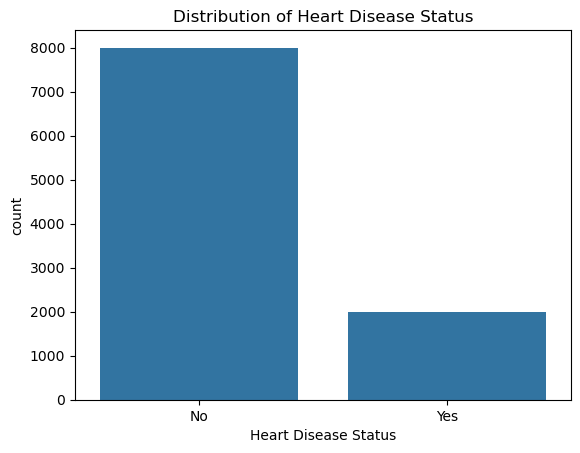

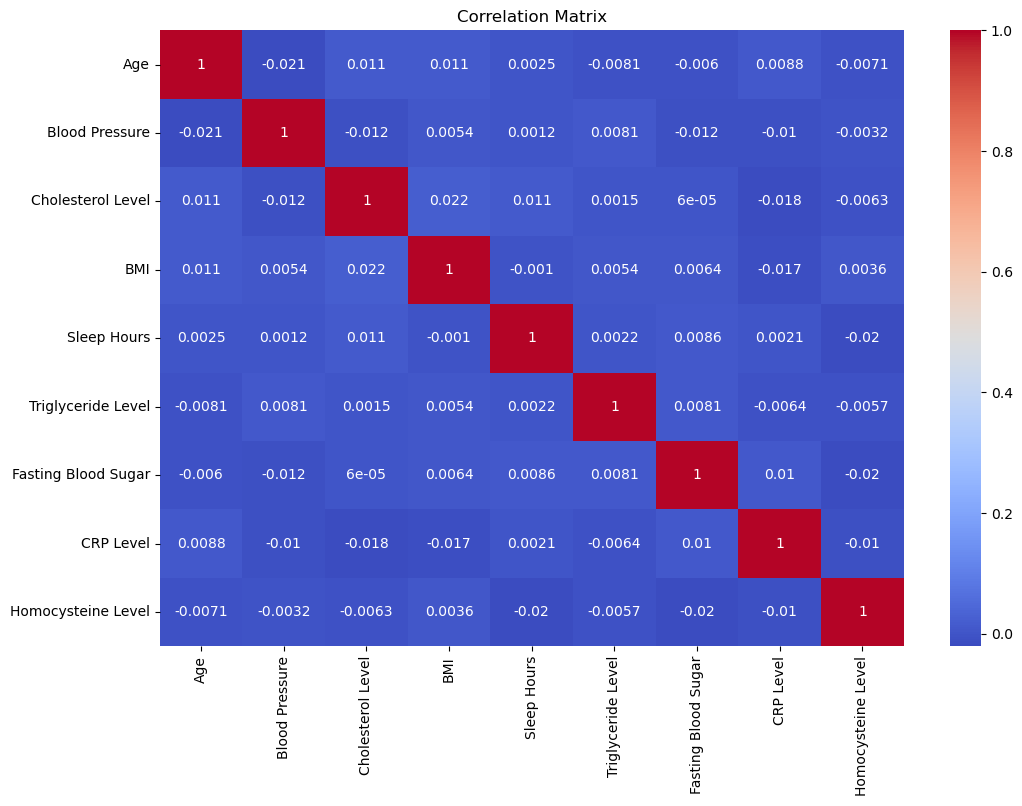

In [3]:
# Info Data
print(df.info())

# Statistik Deskriptif
print(df.describe())

# Cek Missing Values
print(df.isnull().sum())

# Visualisasi Target
sns.countplot(x='Heart Disease Status', data=df)
plt.title('Distribution of Heart Disease Status')
plt.show()

# Korelasi Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

In [4]:
# 1. Handling Missing Values
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Imputasi Median untuk Numerik
imputer_num = SimpleImputer(strategy='median')
df[numeric_features] = imputer_num.fit_transform(df[numeric_features])

# Imputasi Modus untuk Kategorikal
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer_cat.fit_transform(df[categorical_features])

# 2. Encoding Categorical Data
# Manual Mapping for Binary/Ordinal
binary_cols = ['Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 
               'Low HDL Cholesterol', 'High LDL Cholesterol', 'Heart Disease Status']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

ordinal_cols = {'Exercise Habits': ['Low', 'Medium', 'High'],
                'Alcohol Consumption': ['None', 'Low', 'Medium', 'High'],
                'Stress Level': ['Low', 'Medium', 'High'],
                'Sugar Consumption': ['Low', 'Medium', 'High']}

for col, order in ordinal_cols.items():
    df[col] = df[col].apply(lambda x: order.index(x) if x in order else -1)

# 3. Splitting Data
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape X_train:", X_train_scaled.shape)
print("Shape X_test:", X_test_scaled.shape)

# Save Preprocessed Data (optional for verification)
pd.DataFrame(X_train_scaled, columns=X.columns).join(y_train.reset_index(drop=True)).to_csv('heart_disease_preprocessing/train.csv', index=False)
pd.DataFrame(X_test_scaled, columns=X.columns).join(y_test.reset_index(drop=True)).to_csv('heart_disease_preprocessing/test.csv', index=False)

Shape X_train: (8000, 20)
Shape X_test: (2000, 20)
